# Segments
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [imgFX_segments.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Generative/imgFX_segments.ipynb)
---
Image effect algorithm that simulates small filaments inspired by old watch LCDs.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math, time
from PIL import Image as image

from _utils import *

In [2]:
class Segment:
    def __init__(self, tx, ty, width, offset, orient):
        self.tx = tx + int(size*0.5)
        self.ty = ty + int(size*0.5)
        self.width = int(size*width)
        self.offset = int(size*offset) - int(size*0.5)
        self.orient = orient
    
    def kernel(self):
        '''
        Kernel definition
        '''
        self.xmin = self.tx - int(size*0.5)
        self.xmax = self.tx + int(size*0.5)
        self.ymin = self.ty - int(size*0.5)
        self.ymax = self.ty + int(size*0.5)
    
    def getColor(self):
        '''
        Segment color
        '''
        cr, cg, cb = 0, 0, 0
        count = 0
        for y in range(self.ymin, self.ymax):
            for x in range(self.xmin, self.xmax):
                try:
                    c = imgIn.getpixel((x, y))
                    cr += c[0]
                    cg += c[1]
                    cb += c[2]
                    count += 1
                except:
                    continue
        cr = int(cr/count)
        cg = int(cg/count)
        cb = int(cb/count)
        self.cd = (cr, cg, cb)
    
    def draw(self):
        '''
        Draw a segment
        '''
        for y in range(self.ymin, self.ymax):
            for x in range(self.xmin, self.xmax):
                try:
                    lim = max(self.xmax + self.ymin + self.offset, self.xmin + self.ymax + self.offset)
                    if ((x + y) >= lim - self.width) & ((x + y) < lim + self.width - 1):
                        if self.orient == 0:
                            imgOut.putpixel((x, y), self.cd)
                        else:
                            imgOut.putpixel(((self.xmax + self.xmin - x - 1), y), self.cd)
                    else:
                        continue
                except:
                    continue

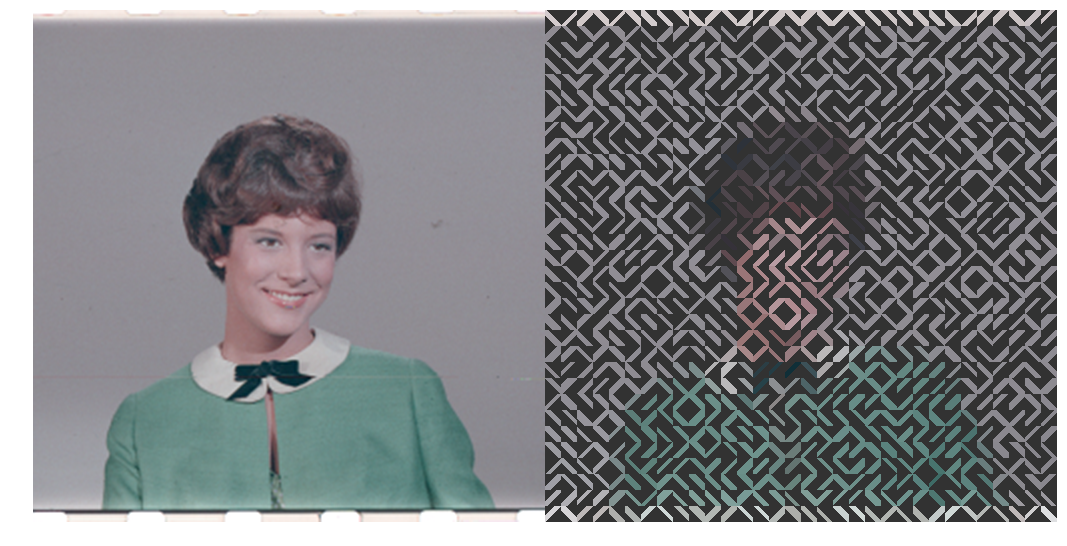

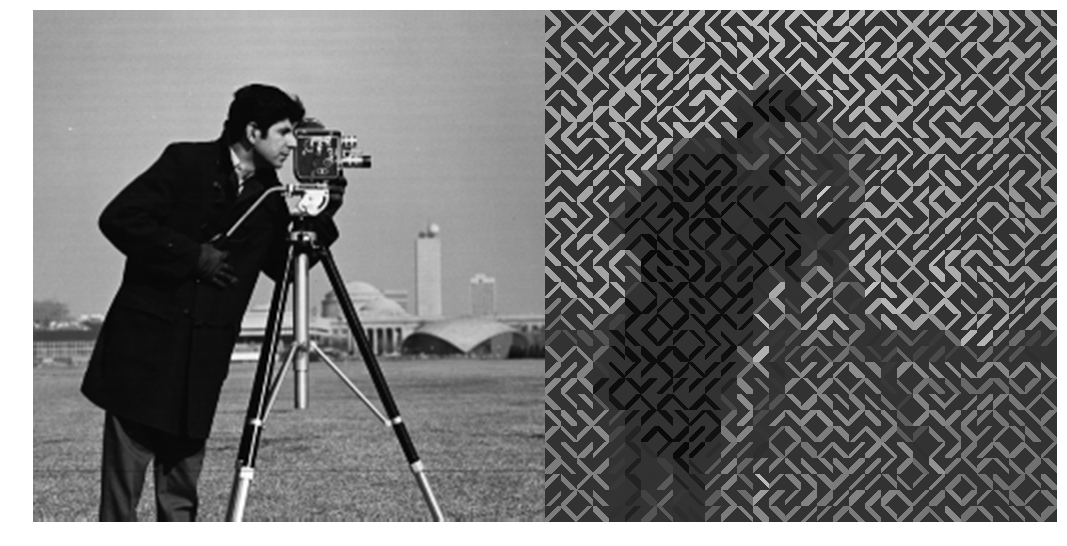

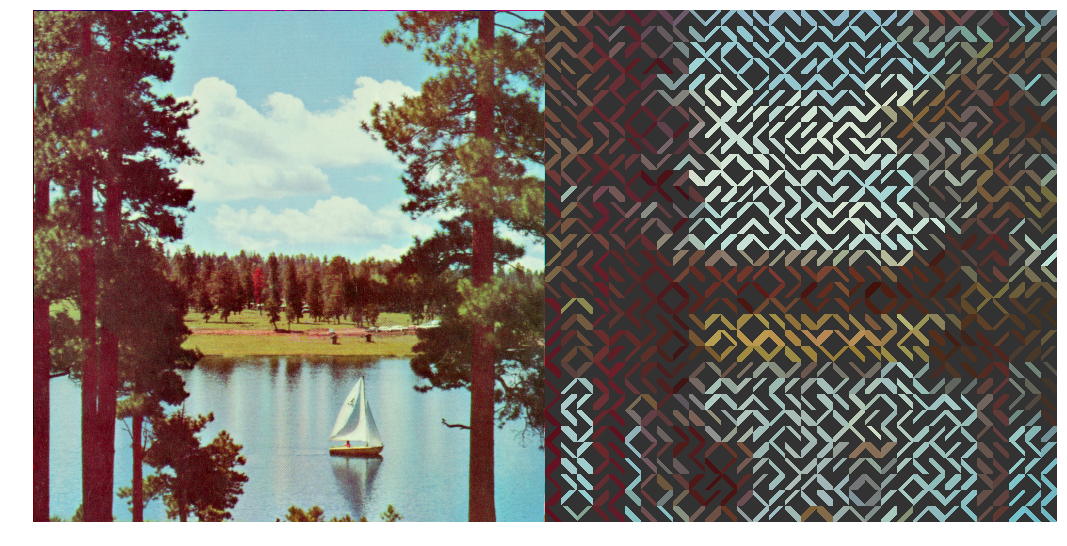

Wall time: 3.94 s


In [3]:
%%time
# parameters
size = 16         # kernel size
BG = (50, 50, 50) # background color

# init
lista_img = ['woman02.png', 'cameraman.png', 'sailboat.png']
for imagem in lista_img:
    img = image.open('../_data/' + imagem)
    imx = img.size[0]
    imy = img.size[1]
    imgIn = image.new('RGB', img.size)
    imgIn.paste(img)
    imgOut = image.new('RGB', img.size, BG)

    # execution
    los = []

    ty = 0
    while ty < imy:
        tx = 0
        while tx < imx:
            width = random.uniform(0.2, 0.4)
            offset = random.uniform(0.25, 0.75)
            orient = int(random.uniform(0, 2))
            temp = Segment(tx, ty, width, offset, orient)
            los.append(temp)
            tx += size
        ty += size

    for segm in los:
        segm.kernel()
        segm.getColor()
        segm.draw()

    output = np.array([np.asarray(imgIn),
                       np.asarray(imgOut)])
    panel(output, (2, 1))